## Importing Necessary Libraries

In [2]:
# For analysis and numerical functions
import pandas as pd
import numpy as np

# For Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

# Extra
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.metrics import r2_score


## Dataset Loading

In [3]:
df=pd.read_csv("day.csv")

In [4]:
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [5]:
df.shape

(730, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Missing Value Check

In [7]:
df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [8]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

## EDA

In [9]:
## Separating Continuous and Categorical Variables for EDA Analysis
cont_cols=["instant","temp","atemp","hum","windspeed","casual","registered"]
cat_cols=["dteday", "season","yr","mnth", "holiday","weekday","workingday","weathersit"]
target=["cnt"]
len(cont_cols)+len(cat_cols)+len(target)

16

## Univariate Analysis

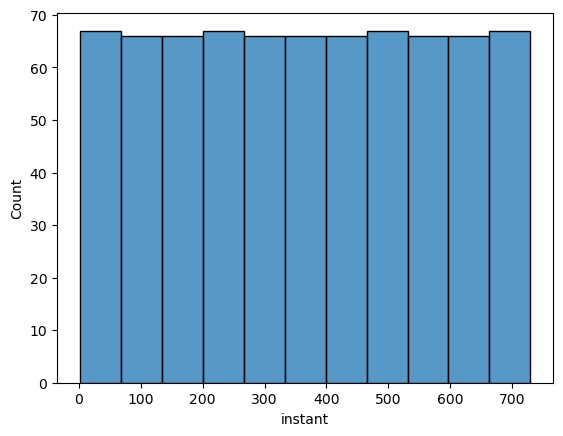

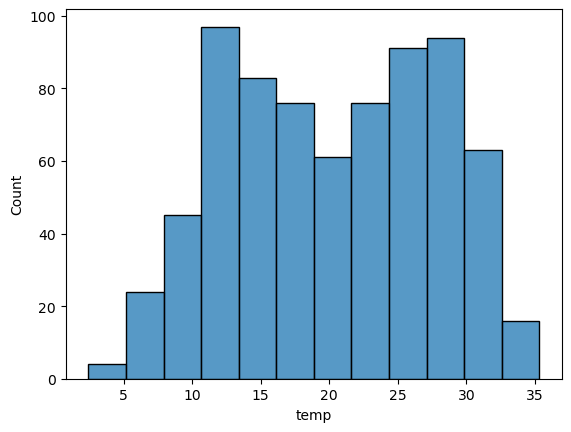

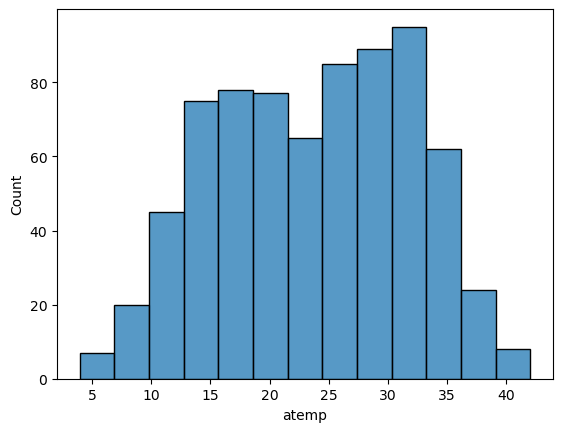

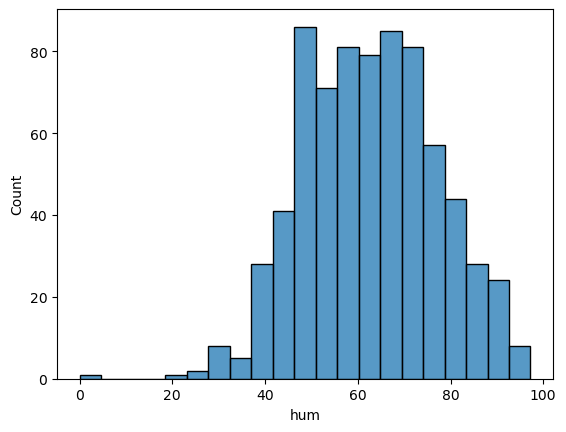

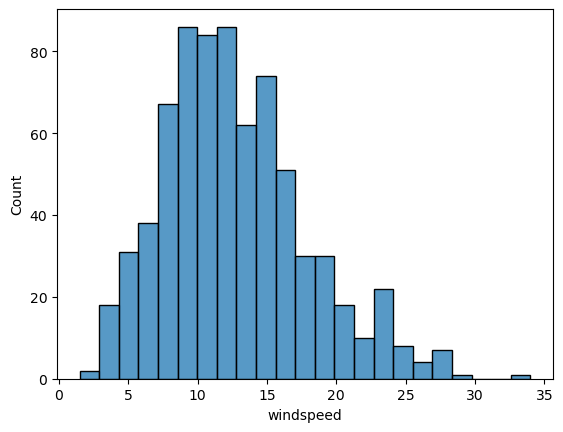

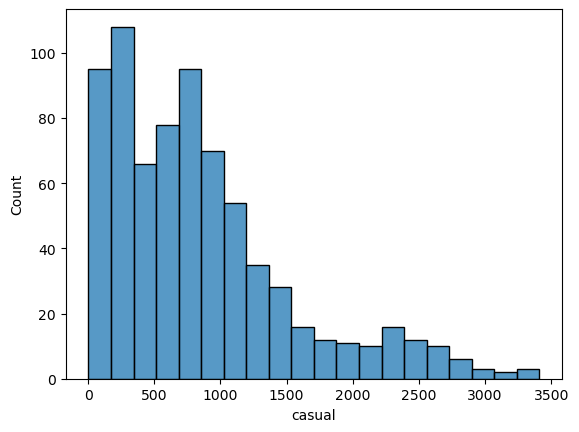

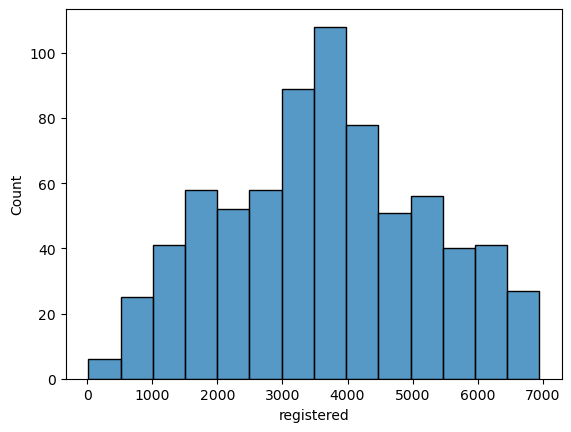

In [10]:
for i in cont_cols:
    sns.histplot(x=df[i])
    plt.show()

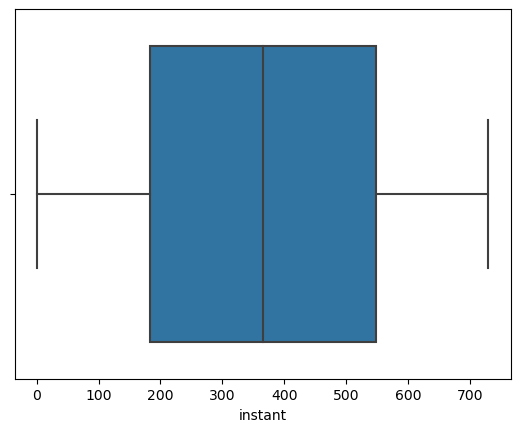

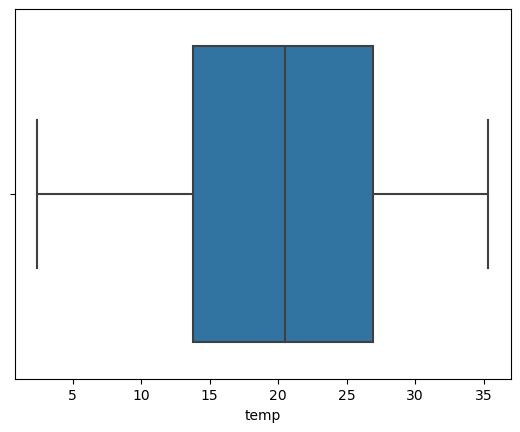

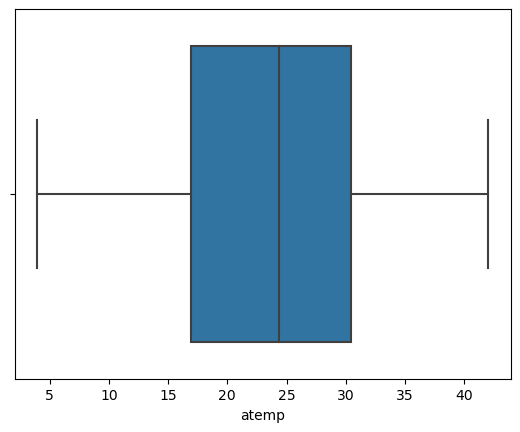

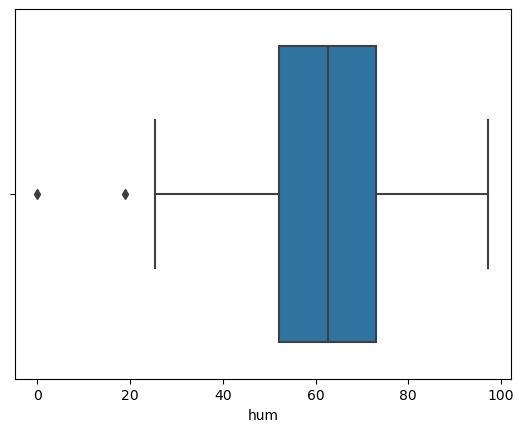

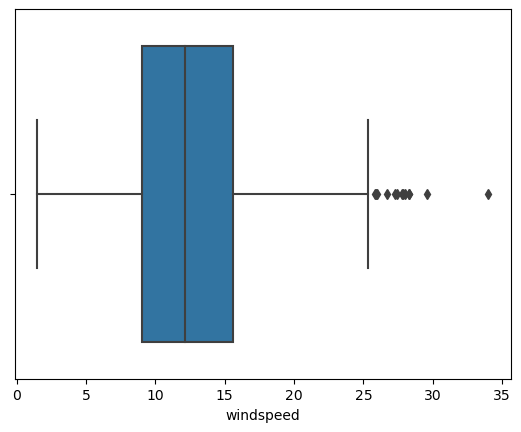

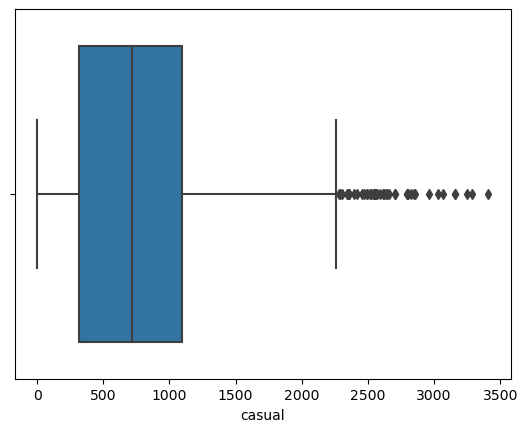

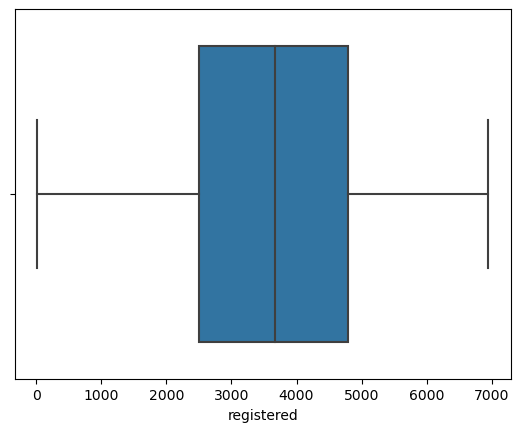

In [116]:
for i in cont_cols:
    sns.boxplot(x=df[i])
    plt.show()

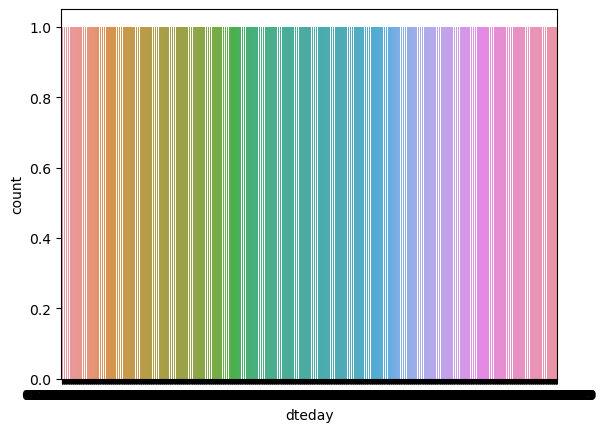

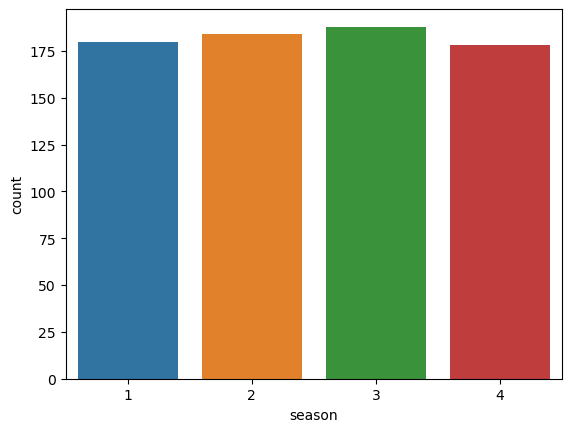

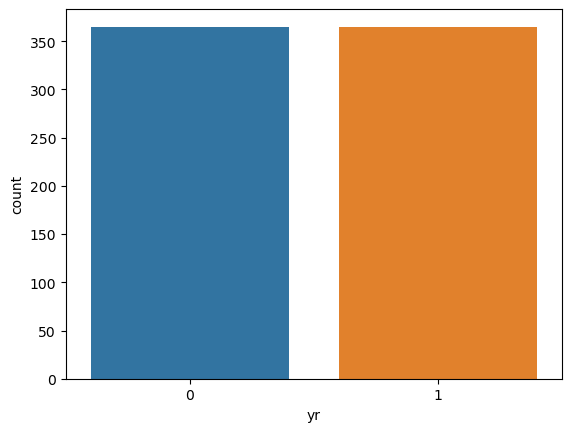

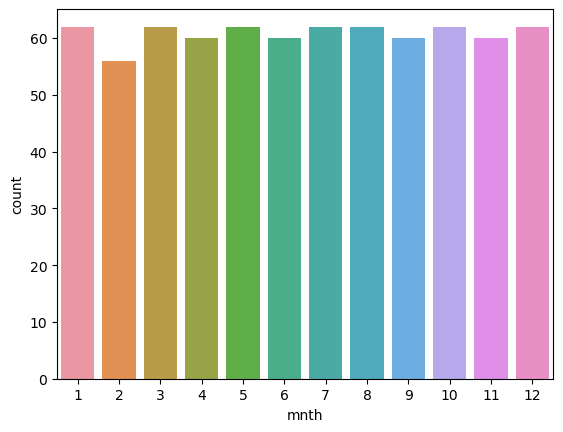

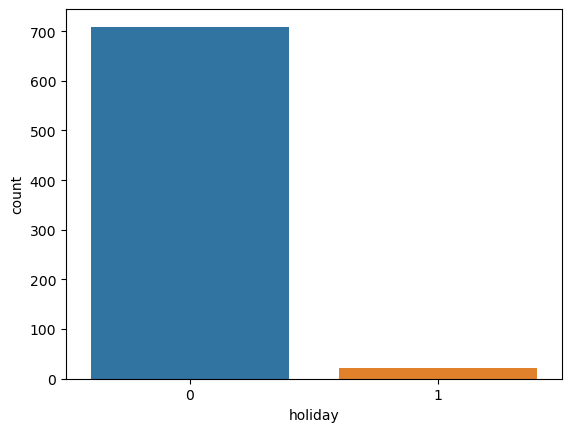

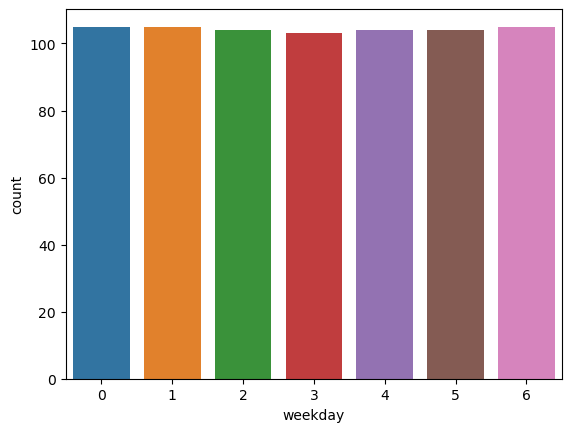

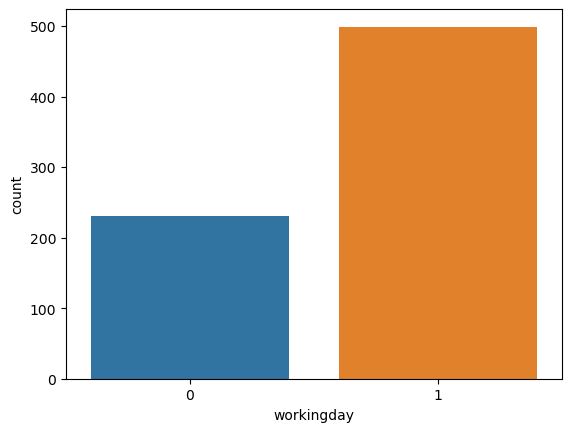

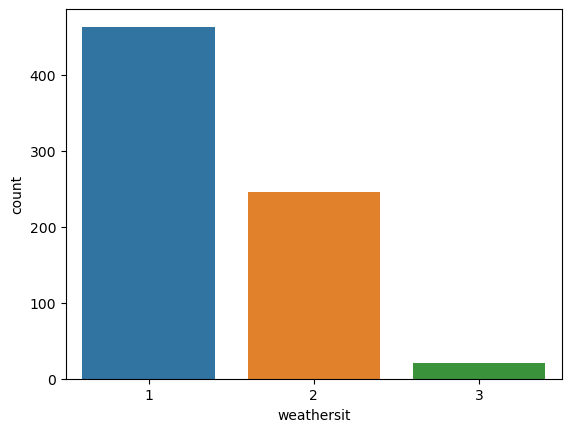

In [117]:
for i in cat_cols:
    sns.countplot(x=df[i])
    plt.show()

## Bivariate Analysis

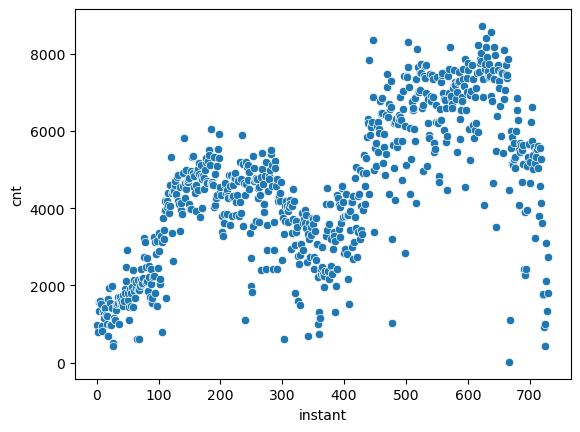

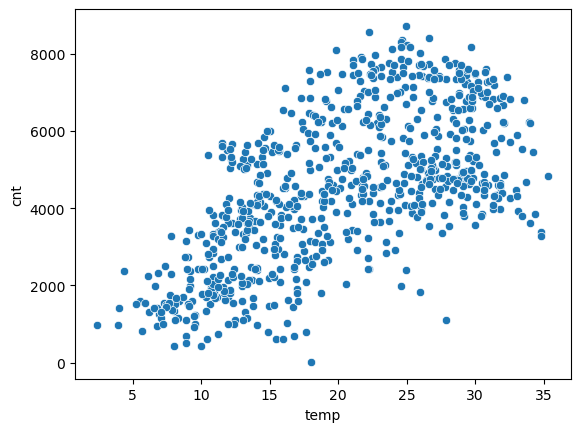

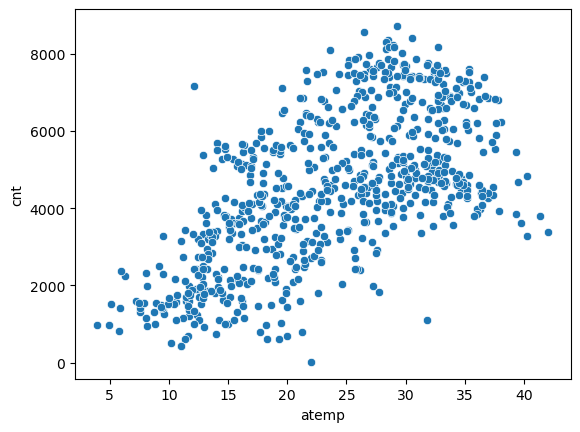

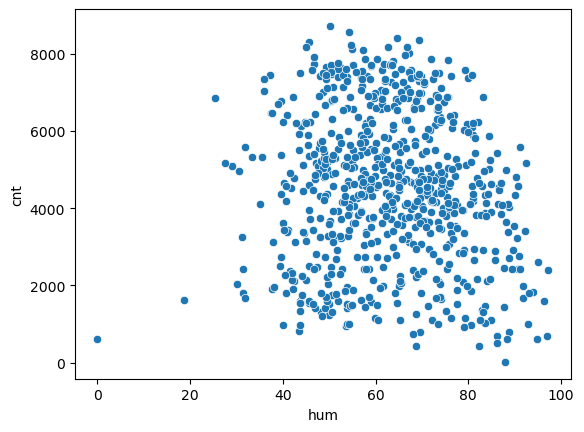

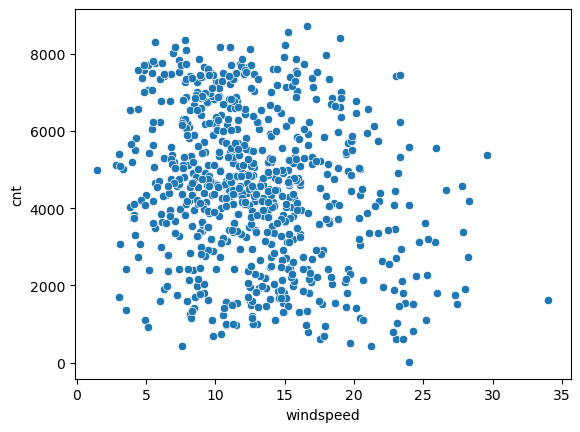

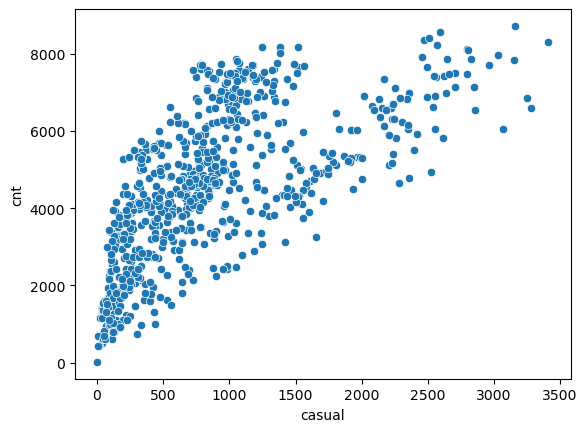

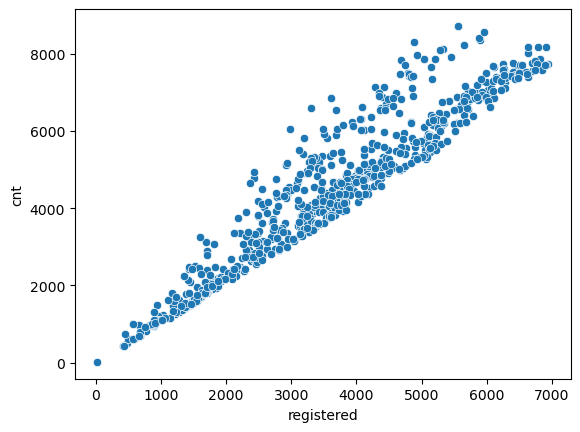

In [11]:
for i in cont_cols:
    sns.scatterplot(x=df[i],y=df["cnt"])
    plt.show()

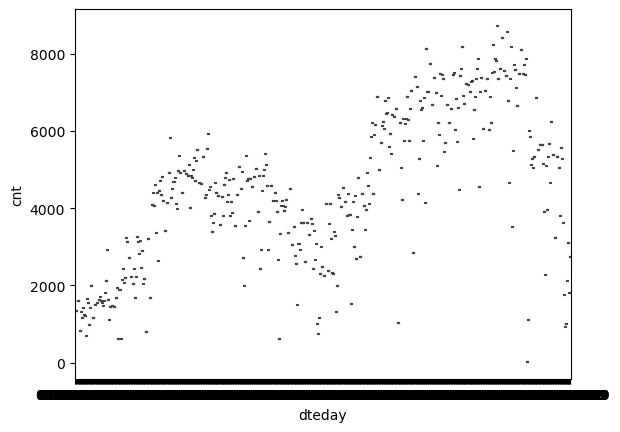

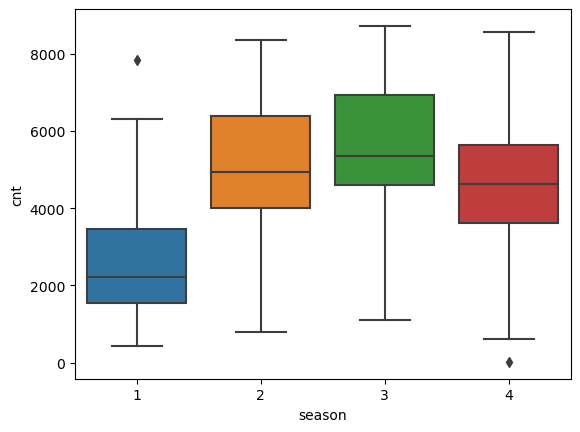

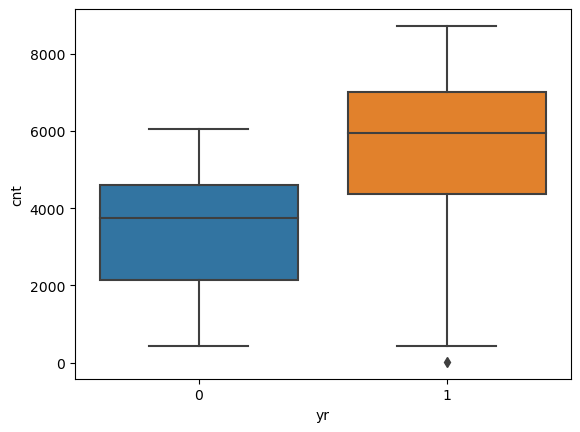

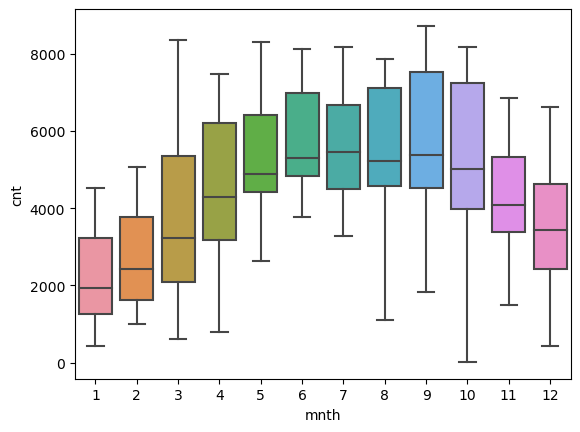

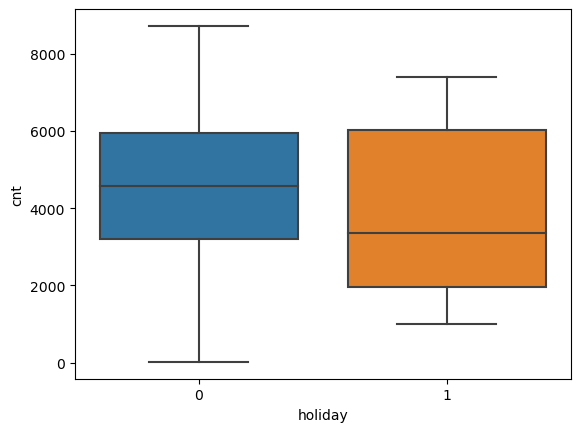

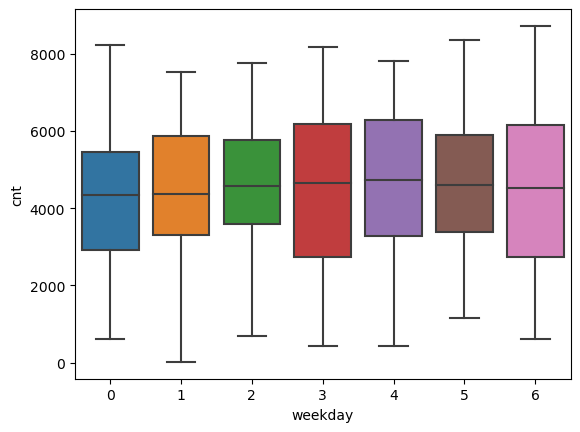

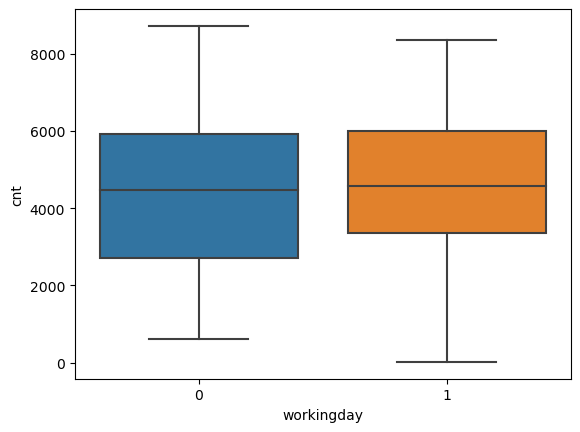

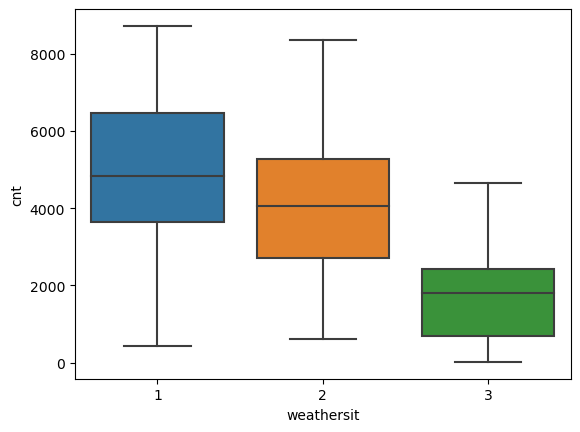

In [12]:
for i in cat_cols:
    sns.boxplot(x=df[i],y=df["cnt"])
    plt.show()

## Multivariate Analysis

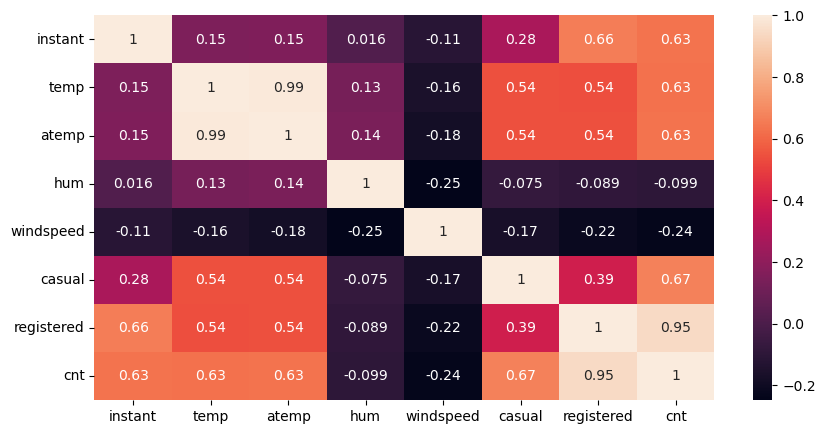

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(df[cont_cols+["cnt"]].corr(),annot=True)
plt.show()

## Pre-processing Steps

### Dummy Variable Creation (One Hot Encoding)

In [14]:
# Converting season to categorical string values : 1:spring, 2:summer, 3:fall, 4:winter

# Defining the map function
def season_map(x):
    match x:
        case 1:
            return "spring"
        case 2:
            return "summer"
        case 3:
            return "fall"
        case default:
            return "winter"

# Applying the function to the housing list
df['season'] = df['season'].apply(lambda x : season_map(x))

In [15]:
df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [16]:
# for season column 
seasons = pd.get_dummies(df['season'], )

# Check what the dataset 'seasons' looks like
seasons.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [17]:
# Let's drop the first column from seasons df using 'drop_first = True'
seasons = pd.get_dummies(df['season'], drop_first = True)

In [18]:
# Check what the dataset 'seasons' looks like
seasons.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [20]:
# Converting weathersit to categorical string values 

# - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#   2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#   3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 	4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


In [19]:
# Defining the map function
def weather_map(x):
    match x:
        case 1:
            return "ClearOrPartlyCloudy"
        case 2:
            return "MistAndCloudy"
        case 3:
            return "LightSnowAndRain"
        case default:
            return "HeavyRainAndThunder"

# Applying the function to the housing list
df['weathersit'] = df['weathersit'].apply(lambda x : weather_map(x))

In [21]:
df['weathersit'].value_counts()

ClearOrPartlyCloudy    463
MistAndCloudy          246
LightSnowAndRain        21
Name: weathersit, dtype: int64

In [22]:
# for weathersit column 

weathers = pd.get_dummies(df['weathersit'], )

# Check what the dataset 'weathers' looks like
weathers.head()

## There is no HeavyRainAndThunder in the data so, either any of the three present. We can drop first ClearOrPartlyCloudy
## and still can find this value i,e 00 means weathersit is ClearOrPartlyCloudy


,ClearOrPartlyCloudy,LightSnowAndRain,MistAndCloudy
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [23]:
# Let's drop the first column from weathers df using 'drop_first = True'
weathers = pd.get_dummies(df['weathersit'], drop_first = True)

In [25]:
df['dteday'] = df['dteday'].astype('datetime64[ns]')

In [26]:
df['mnth'] =  df['dteday'].dt.month_name()
df['weekday'] =  df['dteday'].dt.day_name()

In [27]:
df['mnth'].head()

0     January
1    February
2       March
3       April
4         May
Name: mnth, dtype: object

In [28]:
df['weekday'].head()

0      Monday
1    Thursday
2    Thursday
3      Sunday
4     Tuesday
Name: weekday, dtype: object

In [29]:
# Let's drop the first column from months df using 'drop_first = True'
months = pd.get_dummies(df['mnth'], drop_first = True)

In [30]:
# Let's drop the first column from days df using 'drop_first = True'
days = pd.get_dummies(df['weekday'], drop_first = True)

In [31]:
# Add the weathers ,seasons, months df to the original bike_sharing_data dataframe
df = pd.concat([df, seasons, weathers, months, days], axis = 1)

# Now let's see the head of our dataframe.
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,2018-01-01,spring,0,January,0,Monday,0,MistAndCloudy,14.110847,...,0,0,0,0,1,0,0,0,0,0
1,2,2018-02-01,spring,0,February,0,Thursday,0,MistAndCloudy,14.902598,...,0,0,0,0,0,0,0,1,0,0
2,3,2018-03-01,spring,0,March,0,Thursday,1,ClearOrPartlyCloudy,8.050924,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,spring,0,April,0,Sunday,1,ClearOrPartlyCloudy,8.200000,...,0,0,0,0,0,0,1,0,0,0
4,5,2018-05-01,spring,0,May,0,Tuesday,1,ClearOrPartlyCloudy,9.305237,...,1,0,0,0,0,0,0,0,1,0


In [32]:
# Drop 'season' and 'weathersit' , 'mnth' and 'weekday' as we have created the dummies for it
df.drop(['season', 'weathersit', 'mnth', 'weekday'], axis = 1, inplace = True)

df.head()

,instant,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,331,...,0,0,0,0,1,0,0,0,0,0
1,2,2018-02-01,0,0,0,14.902598,17.68695,69.6087,16.652113,131,...,0,0,0,0,0,0,0,1,0,0
2,3,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,120,...,0,0,0,0,0,0,0,1,0,0
3,4,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,108,...,0,0,0,0,0,0,1,0,0,0
4,5,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,82,...,1,0,0,0,0,0,0,0,1,0


In [33]:
# We can drop 'instant' column as this is just an index. Not be used as a predictors
# We can drop 'dteday' column as this can't be a predictors . Already year , month , weekday and workingday
# all these columns are already there

# we can drop casual and registered as any one out of casual or registered or cnt can be target var

df.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)


In [34]:
df.shape

(730, 30)

In [35]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,1,0,0,0,0,0,0,0,1,0


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                730 non-null    int64  
 1   holiday           730 non-null    int64  
 2   workingday        730 non-null    int64  
 3   temp              730 non-null    float64
 4   atemp             730 non-null    float64
 5   hum               730 non-null    float64
 6   windspeed         730 non-null    float64
 7   cnt               730 non-null    int64  
 8   spring            730 non-null    uint8  
 9   summer            730 non-null    uint8  
 10  winter            730 non-null    uint8  
 11  LightSnowAndRain  730 non-null    uint8  
 12  MistAndCloudy     730 non-null    uint8  
 13  August            730 non-null    uint8  
 14  December          730 non-null    uint8  
 15  February          730 non-null    uint8  
 16  January           730 non-null    uint8  
 1

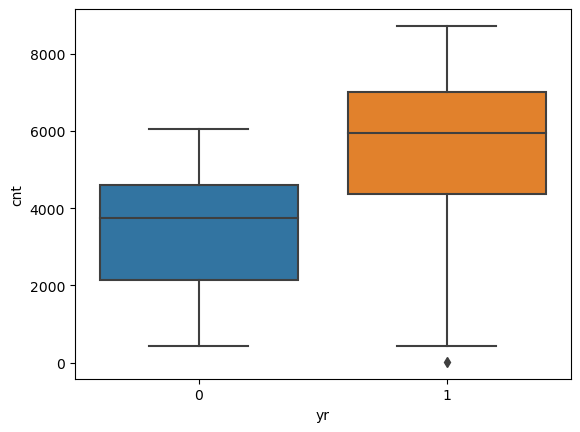

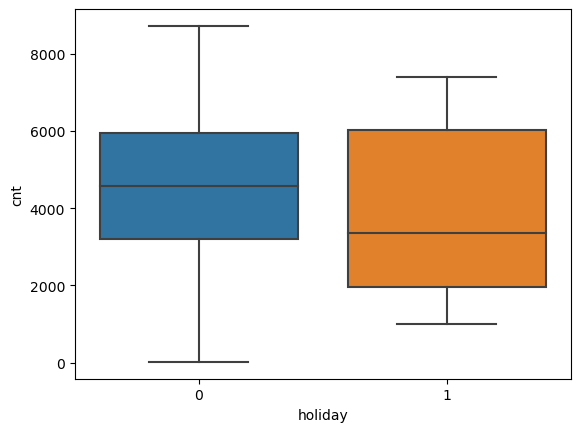

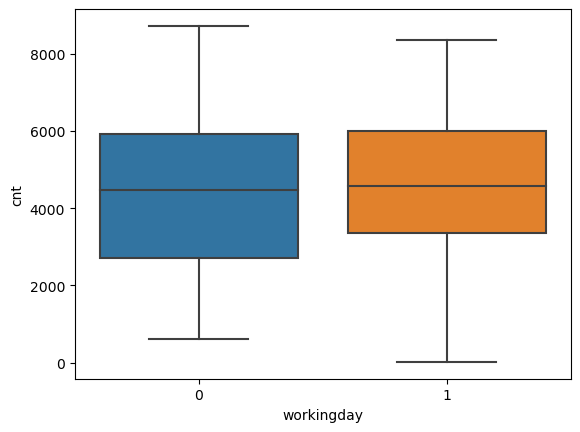

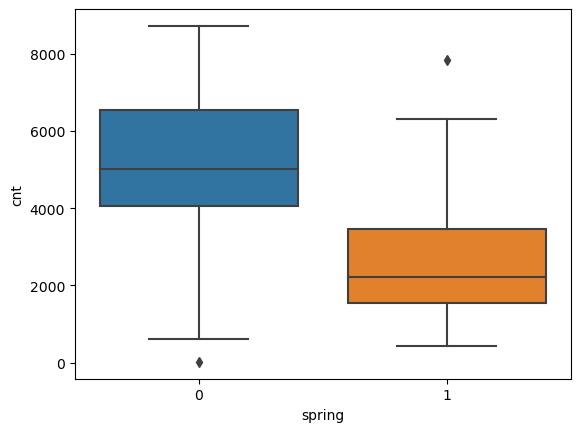

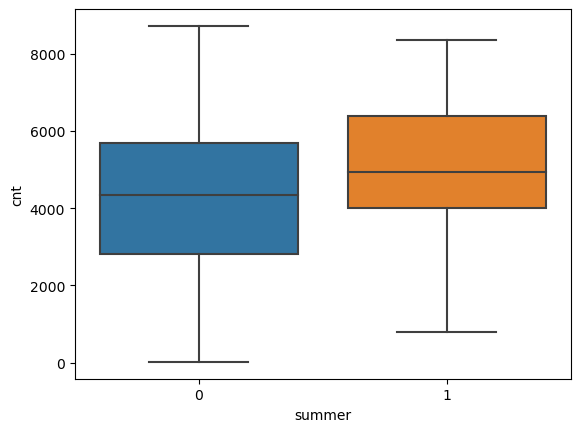

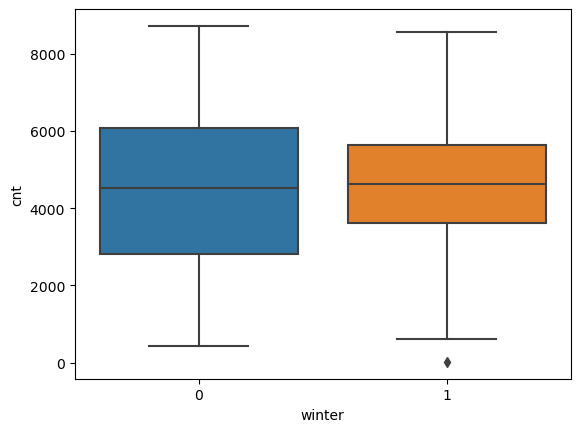

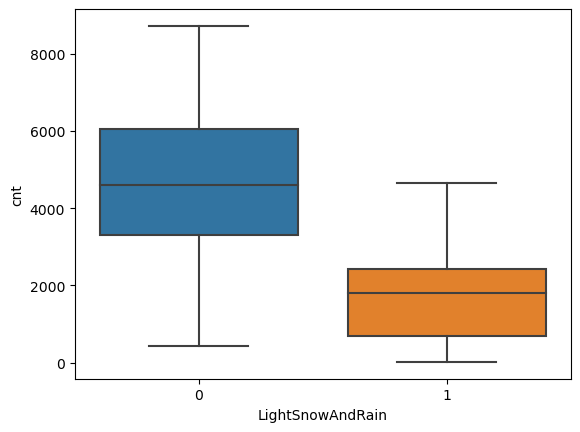

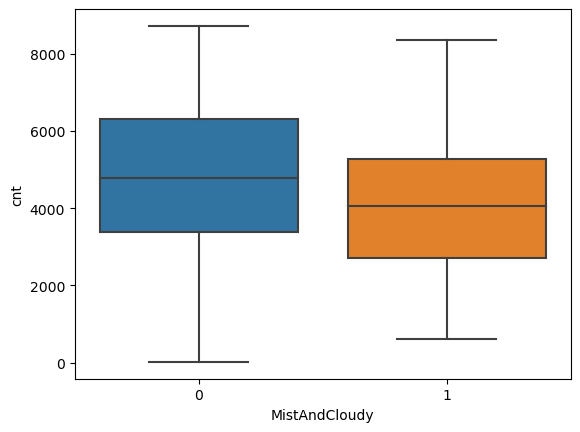

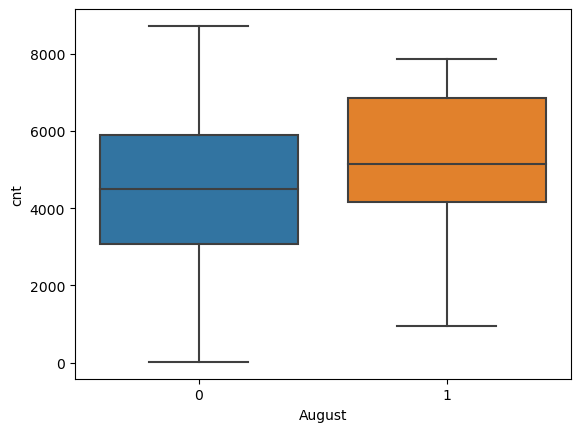

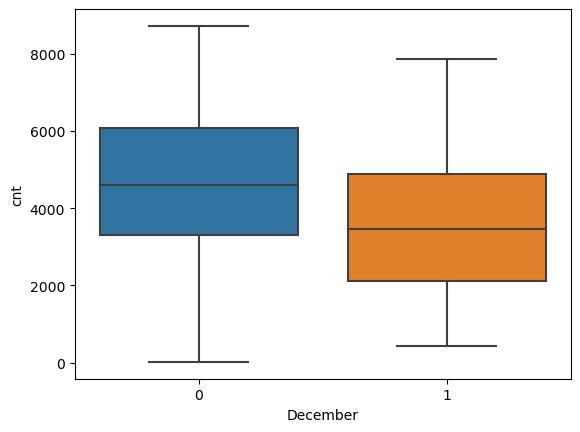

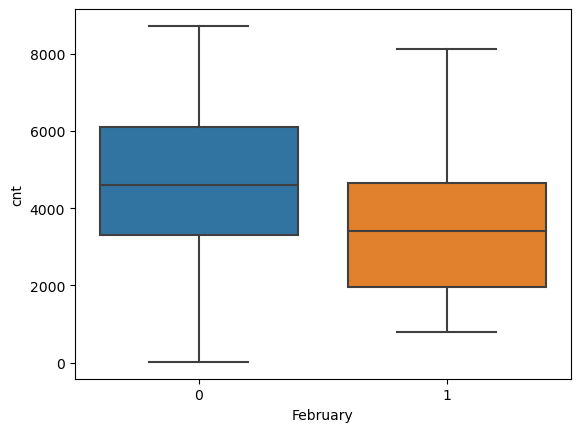

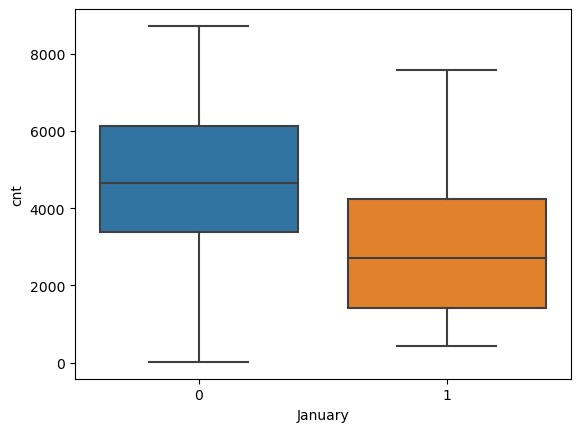

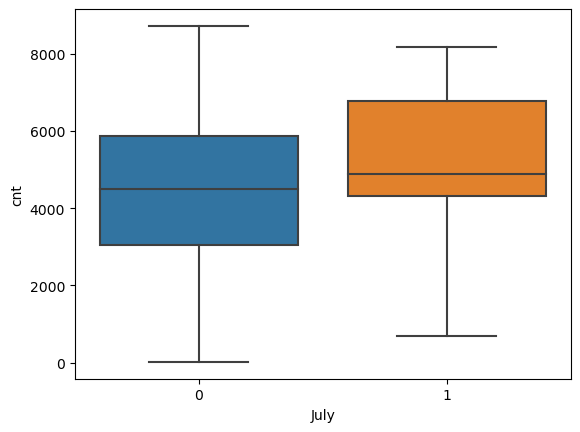

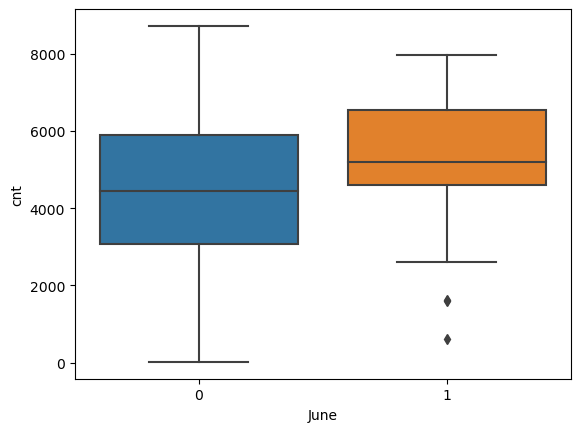

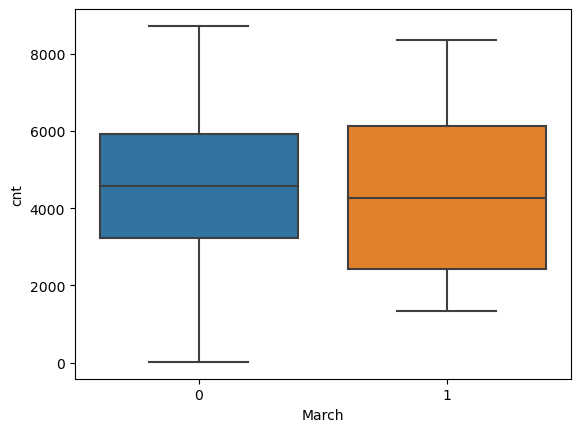

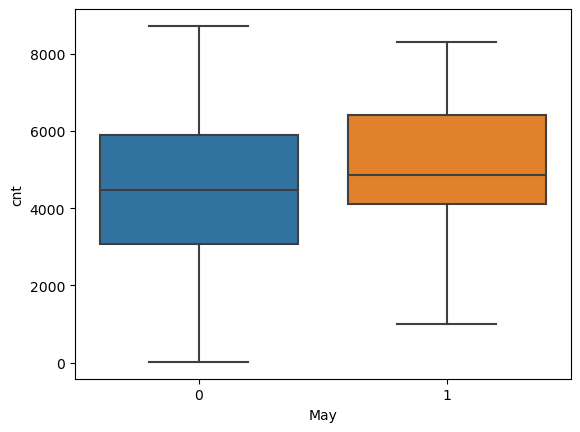

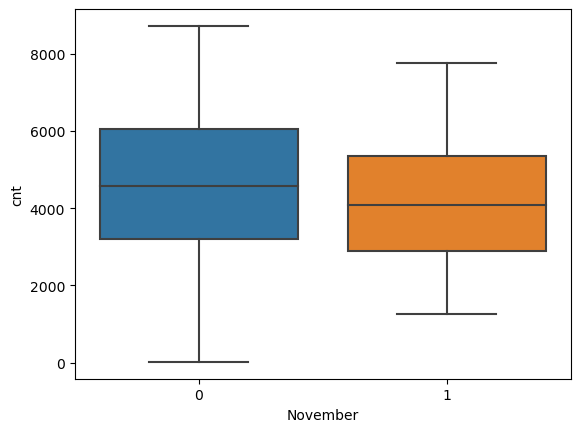

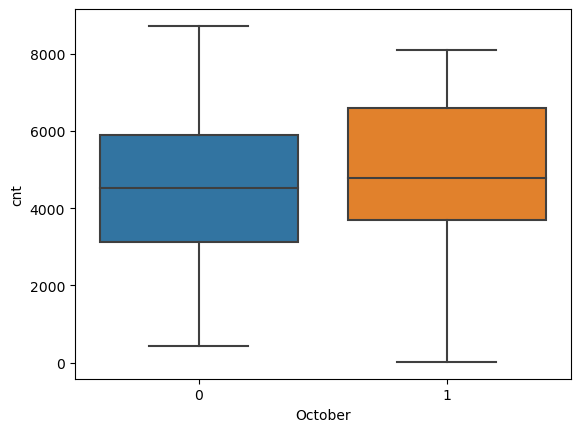

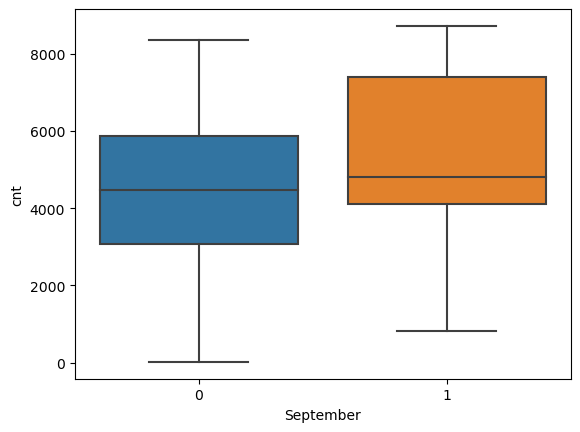

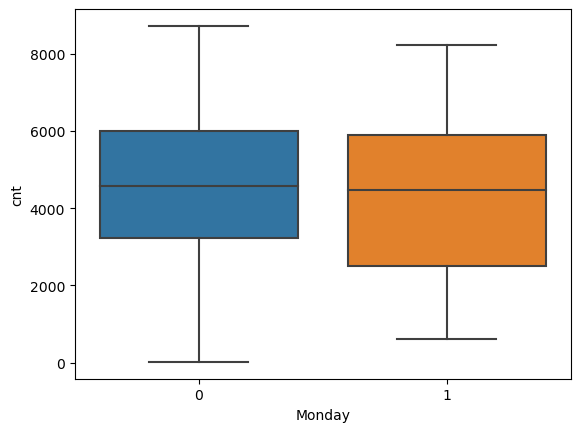

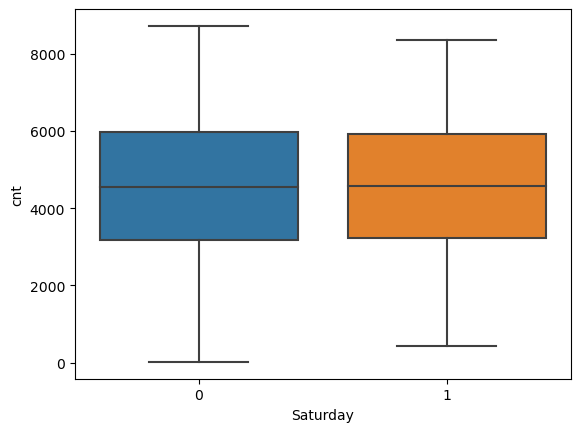

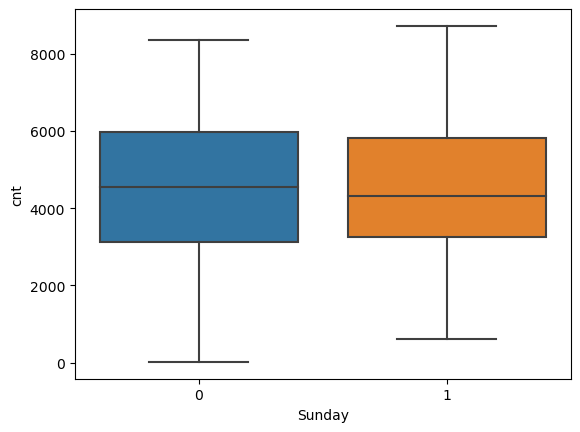

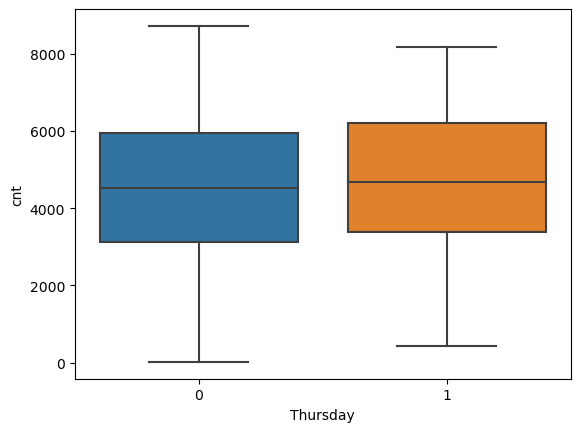

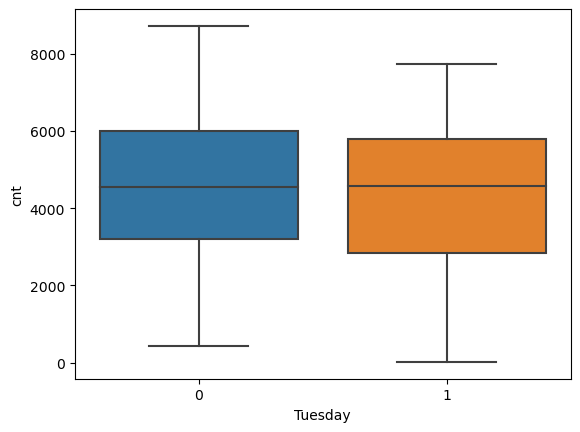

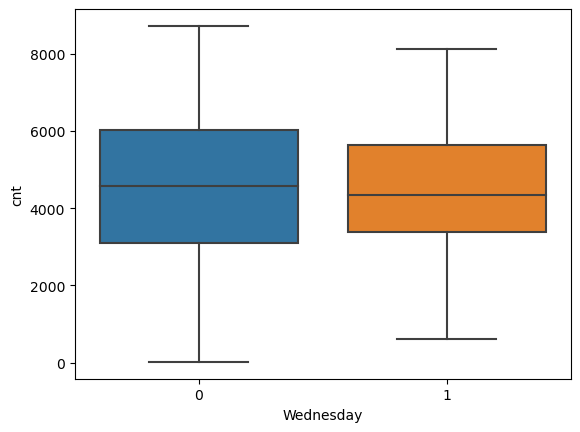

In [36]:
## Again Doing Analysis of the final Columns which would help in deciding the feautres for model
cont_cols = ['temp', 'atemp', 'hum','windspeed']
cat_cols = ['yr', 'holiday', 'workingday', 'spring', 'summer', 'winter', 'LightSnowAndRain', 'MistAndCloudy', 'August',
           'December', 'February', 'January', 'July', 'June', 'March', 'May', 'November', 'October', 'September', 
           'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

for i in cat_cols:
    sns.boxplot(x=df[i],y=df["cnt"])
    plt.show()

In [37]:
# From the boxplot above we can observe that yr , holiday , spring , summer , winter , LightSnowAndRain , MistAndCloudy,.
# September , July , January , Febuary and December shows good changes with respect to Cnt .



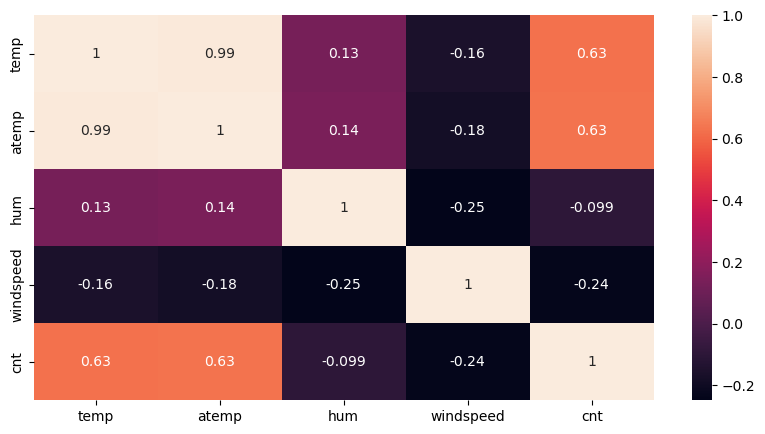

In [38]:
plt.figure(figsize=(10,5))
sns.heatmap(df[cont_cols+["cnt"]].corr(),annot=True)
plt.show()

## We can analyze that temp and atemp are higly corelated . SO one of them can be dropped 
## Then Only temp and windspeed have good corelations with cnt target variable

### Train-Test Split

In [47]:
#!pip install -U scikit-learn

In [39]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_vars = ['temp', 'atemp', 'hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()



,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,-0.121335,-0.055878,-0.514725,-0.117752,1.562685,0,0,...,0,0,1,0,0,0,0,0,0,1
576,1,0,1,1.231731,1.194106,0.516433,-0.330615,1.399629,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,-0.420478,-0.348834,-0.069854,-0.385694,-0.215554,1,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,0,-1.294913,-1.473492,-1.045032,2.018143,-1.379511,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,-0.627580,-0.571474,-1.000840,-0.779889,-0.136589,0,1,...,0,0,0,0,0,0,1,0,0,0


In [41]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

y_test = df_test.pop('cnt')
X_test = df_test

In [ ]:
# Dividing into X and Y sets for the model building¶

In [42]:
y_train = df_train.pop('cnt')
X_train = df_train

In [43]:
X_train.shape

(510, 29)

In [44]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,-0.121335,-0.055878,-0.514725,-0.117752,0,0,1,...,0,0,1,0,0,0,0,0,0,1
576,1,0,1,1.231731,1.194106,0.516433,-0.330615,0,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,-0.420478,-0.348834,-0.069854,-0.385694,1,0,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,0,-1.294913,-1.473492,-1.045032,2.018143,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,-0.627580,-0.571474,-1.000840,-0.779889,0,1,0,...,0,0,0,0,0,0,1,0,0,0


## Modelling

### Feature Selection

In [52]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=12)

selector=selector.fit(X_train,y_train)
selector.support_

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True])

In [53]:
selected_features=X_train.columns[selector.support_]

In [54]:
selected_features

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'summer', 'winter',
       'LightSnowAndRain', 'MistAndCloudy', 'January', 'July', 'September'],
      dtype='object')

In [55]:
X_train=X_train[selected_features]
X_test=X_test[selected_features]

In [56]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

In [57]:
X_train_sm.head()

,const,yr,holiday,temp,windspeed,spring,summer,winter,LightSnowAndRain,MistAndCloudy,January,July,September
653,1.0,1,0,-0.121335,-0.117752,0,0,1,0,0,0,0,0
576,1.0,1,0,1.231731,-0.330615,0,0,0,0,0,0,1,0
426,1.0,1,0,-0.420478,-0.385694,1,0,0,0,1,0,0,0
728,1.0,1,0,-1.294913,2.018143,1,0,0,0,0,0,0,0
482,1.0,1,0,-0.627580,-0.779889,0,1,0,0,1,0,0,0


In [58]:
model1=sm.OLS(y_train,X_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     203.6
Date:                Wed, 15 Nov 2023   Prob (F-statistic):          4.74e-183
Time:                        14:47:42   Log-Likelihood:                -270.36
No. Observations:                 510   AIC:                             566.7
Df Residuals:                     497   BIC:                             621.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.4029      0.061     -6.632      0.000      -0.522      -0.284
yr                   1.0466      0.037     28.088      0.000       0.973       1.120
holiday             -0.3777      0.118     -3.202      0.001      -0.610      -0.146
temp                 0.4705      0.034     13.857      0.000       0.404       0.537
windspeed           -0.1172      0.019     -6.052      0.000      -0.155      -0.079
spring              -0.3359      0.092     -3.655      0.000      -0.516      -0.155
summer               0.1681      0.063      2.663      0.008       0.044       0.292
winter               0.3235      0.075      4.327      0.000       0.177       0.470
LightSnowAndRain    -1.2077      0.112    -10.752      0.000      -1.428      -0.987
MistAndCloudy       -0.3532      0.040     -8.879      0.000      -0.431      -0.275
January             -0.1094      0.069     -1.593      0.112      -0.244       0.026
July                -0.1703      0.076     -2.250      0.025      -0.319      -0.022
September            0.2629      0.072      3.663      0.000       0.122       0.404
==============================================================================
Omnibus:                       68.234   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.598
Skew:                          -0.697   Prob(JB):                     1.81e-36
Kurtosis:                       5.408   Cond. No.                         9.52
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,spring,2.42
2,temp,2.08
0,yr,1.92
6,winter,1.67
8,MistAndCloudy,1.51
5,summer,1.35
9,January,1.25
10,July,1.16
11,September,1.11
3,windspeed,1.10


In [60]:
# Dropping 'January' as P value > 0.05
X_train = X_train.drop(["January"],axis=1)


In [61]:
X_train_sm = sm.add_constant(X_train)
model2=sm.OLS(y_train,X_train_sm)
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     221.2
Date:                Wed, 15 Nov 2023   Prob (F-statistic):          1.10e-183
Time:                        14:48:02   Log-Likelihood:                -271.66
No. Observations:                 510   AIC:                             567.3
Df Residuals:                     498   BIC:                             618.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.4165      0.060     -6.914      0.000      -0.535      -0.298
yr                   1.0457      0.037     28.024      0.000       0.972       1.119
holiday             -0.3805      0.118     -3.221      0.001      -0.613      -0.148
temp                 0.4782      0.034     14.211      0.000       0.412       0.544
windspeed           -0.1142      0.019     -5.915      0.000      -0.152      -0.076
spring              -0.3411      0.092     -3.708      0.000      -0.522      -0.160
summer               0.1757      0.063      2.787      0.006       0.052       0.300
winter               0.3370      0.074      4.530      0.000       0.191       0.483
LightSnowAndRain    -1.2029      0.112    -10.696      0.000      -1.424      -0.982
MistAndCloudy       -0.3574      0.040     -8.990      0.000      -0.435      -0.279
July                -0.1621      0.076     -2.144      0.033      -0.311      -0.014
September            0.2731      0.072      3.814      0.000       0.132       0.414
==============================================================================
Omnibus:                       67.503   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.998
Skew:                          -0.690   Prob(JB):                     4.03e-36
Kurtosis:                       5.401   Cond. No.                         9.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,spring,2.29
2,temp,2.07
0,yr,1.92
6,winter,1.67
8,MistAndCloudy,1.49
5,summer,1.35
9,July,1.15
10,September,1.10
3,windspeed,1.09
7,LightSnowAndRain,1.08


In [63]:
# Let's drop July column as P value is 0.033 and incase of alpha = 0.03 this can be dropped and verify the impact
X_train = X_train.drop(["July"],axis=1)

In [64]:
X_train_sm = sm.add_constant(X_train)
model3=sm.OLS(y_train,X_train_sm)
res3=model3.fit()
res3.summary()

## Found that R-squared doesn't have any impact . Better to delete July Column

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.1
Date:                Wed, 15 Nov 2023   Prob (F-statistic):          6.72e-184
Time:                        14:50:46   Log-Likelihood:                -274.00
No. Observations:                 510   AIC:                             570.0
Df Residuals:                     499   BIC:                             616.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.4458      0.059     -7.569      0.000      -0.561      -0.330
yr                   1.0456      0.037     27.921      0.000       0.972       1.119
holiday             -0.3696      0.118     -3.120      0.002      -0.602      -0.137
temp                 0.4732      0.034     14.045      0.000       0.407       0.539
windspeed           -0.1139      0.019     -5.879      0.000      -0.152      -0.076
spring              -0.3278      0.092     -3.558      0.000      -0.509      -0.147
summer               0.2011      0.062      3.235      0.001       0.079       0.323
winter               0.3577      0.074      4.831      0.000       0.212       0.503
LightSnowAndRain    -1.2234      0.112    -10.879      0.000      -1.444      -1.002
MistAndCloudy       -0.3519      0.040     -8.839      0.000      -0.430      -0.274
September            0.2911      0.071      4.080      0.000       0.151       0.431
==============================================================================
Omnibus:                       70.245   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.651
Skew:                          -0.720   Prob(JB):                     3.94e-37
Kurtosis:                       5.411   Cond. No.                         9.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,spring,2.21
2,temp,1.92
0,yr,1.91
6,winter,1.67
8,MistAndCloudy,1.49
5,summer,1.34
9,September,1.10
3,windspeed,1.09
7,LightSnowAndRain,1.06
1,holiday,1.04


In [ ]:
# P Values of all Columns are less than 0.03 and VIF of all Columns are less than 5 and so confirming this model

#   cnt = - 0.4458 + 1.0456 * yr - 0.3696 * holiday + 0.4732 * temp - 0.1139 * windspeed - 0.3278 * spring 
# + 0.2011 * summer + 0.3577 * winter - 1.2234 * LightSnowAndRain - 0.3519 * MistAndCloudy + 0.2911 * September



In [66]:
#Residual Analysis

y_train_pred = res3.predict(X_train_sm)

Text(0.5, 0, 'Errors')

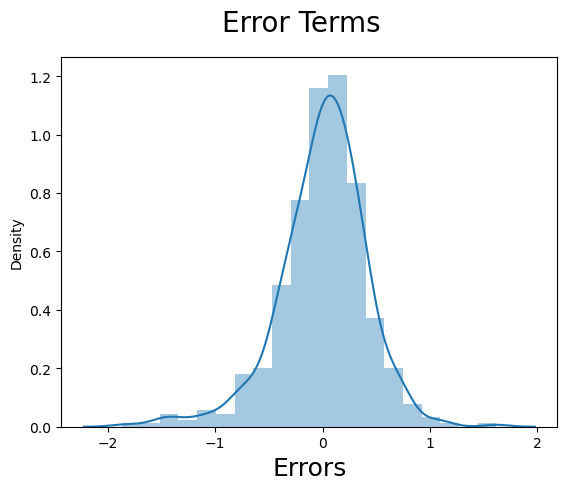

In [67]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

In [68]:
# dropping the columns which got dropped from model
X_test_sm = X_test_sm.drop(["January", "July"], axis = 1)

In [70]:
# Making predictions
y_test_pred = res3.predict(X_test_sm)

Text(0, 0.5, 'y_test_pred')

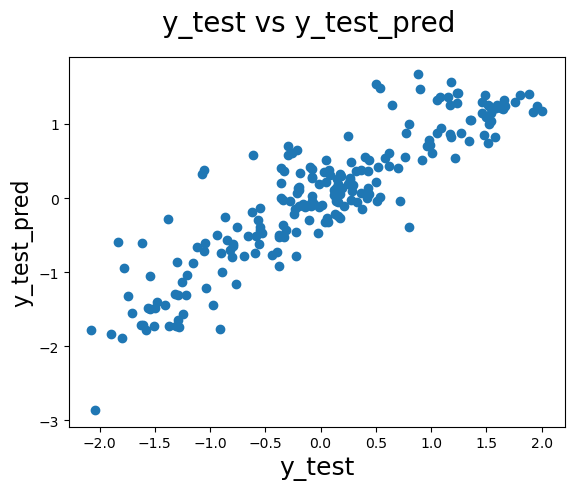

In [71]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_pred', fontsize=16)   

In [73]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.8021596210458576